In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [43]:
df = pd.read_csv('persons_csv.csv')

df.head()

,chest_c,waist_c,gender,size,size_value,height,weight
0,107.4,93.3,Male,XL,4,180.34,81.65
1,102.1,87.0,Male,XL,4,172.72,72.57
2,112.0,96.4,Male,XL,4,172.72,92.99
3,111.4,85.7,Male,L,3,167.64,79.38
4,104.8,86.8,Male,L,3,195.58,96.62


In [44]:
df.loc[df['gender'] == 'Male', 'gender'] = 1
df.loc[df['gender'] == 'Female', 'gender'] = 0

In [68]:
df

,chest_c,waist_c,gender,size,size_value,height,weight
0,107.4,93.3,1,XL,4,180.34,81.65
1,102.1,87.0,1,XL,4,172.72,72.57
2,112.0,96.4,1,XL,4,172.72,92.99
3,111.4,85.7,1,L,3,167.64,79.38
4,104.8,86.8,1,L,3,195.58,96.62
...,...,...,...,...,...,...,...
595,106.4,107.4,0,XXL,5,149.86,68.04
596,92.3,68.8,0,L,3,162.56,61.23
597,86.1,71.3,0,L,3,160.02,49.90
598,105.7,103.5,0,XXL,5,170.18,80.74


In [69]:
X = df.drop(['size_value', 'size'], axis=1).copy()
X.head()

,chest_c,waist_c,gender,height,weight
0,107.4,93.3,1,180.34,81.65
1,102.1,87.0,1,172.72,72.57
2,112.0,96.4,1,172.72,92.99
3,111.4,85.7,1,167.64,79.38
4,104.8,86.8,1,195.58,96.62


In [70]:
y = df.size_value.copy()
y.head()

0    4
1    4
2    4
3    3
4    3
Name: size_value, dtype: int64

In [73]:
X.columns

Index(['chest_c', 'waist_c', 'gender', 'height', 'weight'], dtype='object')

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.33)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.705, 0.9375, 'waist_c <= 91.85\ngini = 0.695\nsamples = 402\nvalue = [2, 6, 36, 68, 120, 170]\nclass = XXL'),
 Text(0.49, 0.8125, 'waist_c <= 81.85\ngini = 0.674\nsamples = 215\nvalue = [2, 6, 36, 68, 95, 8]\nclass = XL'),
 Text(0.3, 0.6875, 'gender <= 0.5\ngini = 0.591\nsamples = 90\nvalue = [2, 6, 31, 48, 3, 0]\nclass = L'),
 Text(0.16, 0.5625, 'chest_c <= 84.85\ngini = 0.428\nsamples = 67\nvalue = [0, 0, 16, 48, 3, 0]\nclass = L'),
 Text(0.08, 0.4375, 'waist_c <= 74.85\ngini = 0.375\nsamples = 20\nvalue = [0, 0, 15, 5, 0, 0]\nclass = M'),
 Text(0.04, 0.3125, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15, 0, 0, 0]\nclass = M'),
 Text(0.12, 0.3125, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 0, 5, 0, 0]\nclass = L'),
 Text(0.24, 0.4375, 'chest_c <= 97.8\ngini = 0.158\nsamples = 47\nvalue = [0, 0, 1, 43, 3, 0]\nclass = L'),
 Text(0.2, 0.3125, 'weight <= 51.26\ngini = 0.044\nsamples = 44\nvalue = [0, 0, 1, 43, 0, 0]\nclass = L'),
 Text(0.16, 0.1875, 'height <= 161.29\ngini = 0.5\nsa

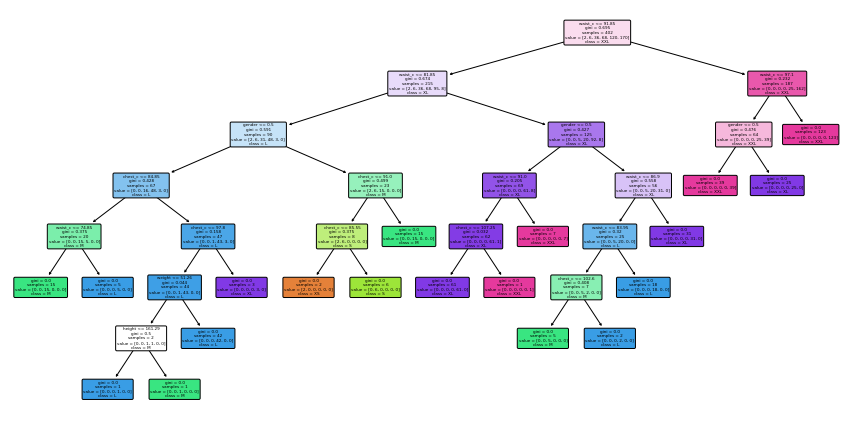

In [76]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=['XS', 'S', 'M', 'L', 'XL', 'XXL'],
          feature_names=X.columns
          )

/Users/gosta/PycharmProjects/BigData/size_generator/venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


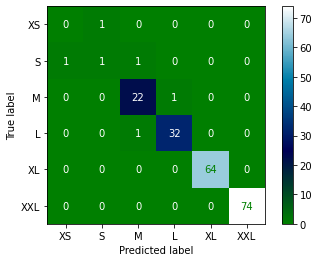

In [77]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['XS', 'S', 'M', 'L', 'XL', 'XXL'], cmap='ocean')

In [78]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [79]:
ccp_alphas

array([0.        , 0.00243103, 0.00489488, 0.00710732, 0.00746269,
       0.01279318, 0.01366235, 0.01865672, 0.0210902 , 0.03029151,
       0.03327451, 0.03884462, 0.05387501, 0.09564894, 0.2267227 ])

In [85]:
ccp_alphas = ccp_alphas[:-1]
ccp_alphas

array([0.        , 0.00243103, 0.00489488, 0.00710732, 0.00746269,
       0.01279318, 0.01366235, 0.01865672, 0.0210902 , 0.03029151,
       0.03327451, 0.03884462, 0.05387501, 0.09564894])

In [80]:
clf_dts = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [81]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

In [82]:
train_scores

[1.0,
 0.9975124378109452,
 0.9950248756218906,
 0.9900497512437811,
 0.9850746268656716,
 0.9776119402985075,
 0.9701492537313433,
 0.9577114427860697,
 0.9427860696517413,
 0.9253731343283582,
 0.8631840796019901,
 0.8134328358208955,
 0.7512437810945274,
 0.6393034825870647,
 0.4228855721393035]

In [83]:
test_scores

[0.9747474747474747,
 0.9747474747474747,
 0.9747474747474747,
 0.9747474747474747,
 0.9797979797979798,
 0.9545454545454546,
 0.9545454545454546,
 0.9343434343434344,
 0.9242424242424242,
 0.9141414141414141,
 0.8535353535353535,
 0.8232323232323232,
 0.7121212121212122,
 0.5757575757575758,
 0.37373737373737376]

[]

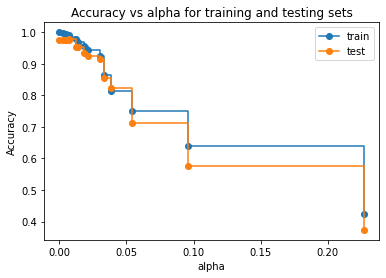

In [84]:
_, ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')

ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.plot()

In [86]:
alpha_scores = []
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_scores.append([ccp_alpha, np.mean(scores), np.std(scores)])

/Users/gosta/PycharmProjects/BigData/size_generator/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/gosta/PycharmProjects/BigData/size_generator/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/gosta/PycharmProjects/BigData/size_generator/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/gosta/PycharmProjects/BigData/size_generator/venv/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/gosta/PycharmProjects/BigData/size_generator/

In [87]:
alpha_scores

[[0.0, 0.9850925925925924, 0.014434944644374151],
 [0.0024310266847580274, 0.9850925925925924, 0.014434944644374151],
 [0.004894880436527043, 0.9850925925925924, 0.014434944644374151],
 [0.007107320540156361, 0.965246913580247, 0.023959326086268686],
 [0.007462686567164179, 0.967746913580247, 0.022865142435745296],
 [0.012793176972281446, 0.9627469135802469, 0.022085829719740876],
 [0.01366234591067872, 0.9627469135802469, 0.022085829719740876],
 [0.018656716417910446, 0.9552469135802468, 0.016702921244892845],
 [0.021090201168072677, 0.9353395061728393, 0.02990277264091216],
 [0.030291506469522417, 0.8956172839506173, 0.02871143530545264],
 [0.033274512932306294, 0.8832716049382716, 0.040001786082666135],
 [0.038844617492248906, 0.8037037037037036, 0.040036824803478865],
 [0.0538750099768537, 0.7763271604938271, 0.043394293409421636],
 [0.09564893876868891, 0.6889506172839506, 0.027288663634052867]]

<AxesSubplot:xlabel='alpha'>

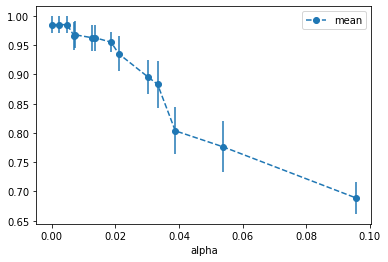

In [88]:
alpha_results = pd.DataFrame(alpha_scores, columns=['alpha', 'mean', 'std'])
alpha_results.plot(x='alpha', y='mean', yerr='std', marker='o', linestyle='--')

In [91]:
alpha_results[(alpha_results['alpha'] > 0.008) & (alpha_results['alpha'] < 0.015)]

,alpha,mean,std
5,0.012793,0.962747,0.022086
6,0.013662,0.962747,0.022086


In [95]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=0.02)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

[Text(0.65, 0.9, 'waist_c <= 91.85\ngini = 0.695\nsamples = 402\nvalue = [2, 6, 36, 68, 120, 170]\nclass = XXL'),
 Text(0.4, 0.7, 'waist_c <= 81.85\ngini = 0.674\nsamples = 215\nvalue = [2, 6, 36, 68, 95, 8]\nclass = XL'),
 Text(0.2, 0.5, 'gender <= 0.5\ngini = 0.591\nsamples = 90\nvalue = [2, 6, 31, 48, 3, 0]\nclass = L'),
 Text(0.1, 0.3, 'chest_c <= 84.85\ngini = 0.428\nsamples = 67\nvalue = [0, 0, 16, 48, 3, 0]\nclass = L'),
 Text(0.05, 0.1, 'gini = 0.375\nsamples = 20\nvalue = [0, 0, 15, 5, 0, 0]\nclass = M'),
 Text(0.15, 0.1, 'gini = 0.158\nsamples = 47\nvalue = [0, 0, 1, 43, 3, 0]\nclass = L'),
 Text(0.3, 0.3, 'chest_c <= 91.0\ngini = 0.499\nsamples = 23\nvalue = [2, 6, 15, 0, 0, 0]\nclass = M'),
 Text(0.25, 0.1, 'gini = 0.375\nsamples = 8\nvalue = [2, 6, 0, 0, 0, 0]\nclass = S'),
 Text(0.35, 0.1, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15, 0, 0, 0]\nclass = M'),
 Text(0.6, 0.5, 'gender <= 0.5\ngini = 0.427\nsamples = 125\nvalue = [0, 0, 5, 20, 92, 8]\nclass = XL'),
 Text(0.5, 

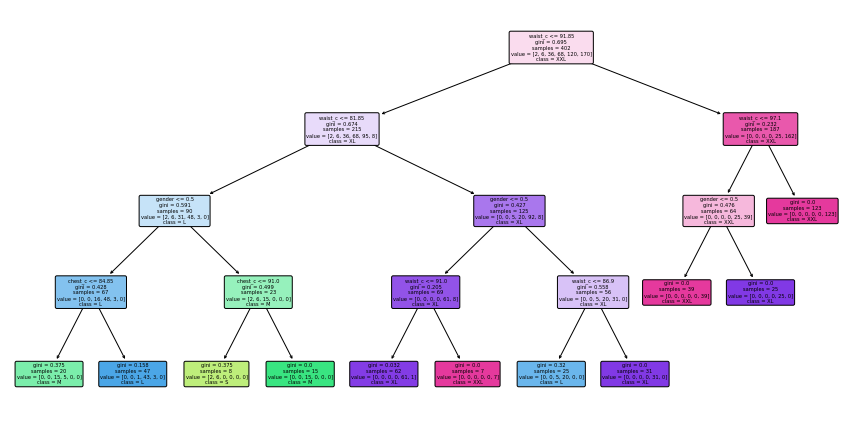

In [96]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
          filled=True,
          rounded=True,
          class_names=['XS', 'S', 'M', 'L', 'XL', 'XXL'],
          feature_names=X.columns
          )

In [101]:

person = [[108, 94, 1, 180, 75]]
clf_dt_pruned.predict(person)

/Users/gosta/PycharmProjects/BigData/size_generator/venv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4])